In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [28]:
# Setting up logging for traceability
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()
# diplay logger info
logger.info("Loading train and test datasets")

2024-09-24 16:37:01,212 - INFO - Loading train and test datasets


In [29]:
def load_and_merge_datasets():
    logging.info("Loading train and test datasets")
    # Load train and test datasets
    store = pd.read_csv("../../data/store.csv")
    store.rename(columns={store.columns[0]: 'Id'}, inplace=True)
    train = pd.read_csv("../../data/train.csv")
    train.rename(columns={train.columns[0]: 'Id'}, inplace=True)
    
    # Merge train and test datasets

    logging.info("Merging the store and the train datasets")
    data = pd.merge(store,train, on='Id', how='inner')

    data.to_csv('../../data/merged.csv',index=False)
    return data

In [30]:
def clean_data(data):
    logging.info('Handling missing values for the "CompetionDistance" column')
    data['CompetitionDistance'].fillna(data['CompetitionDistance'].mean(), inplace=True)

    # Converting the Date to datetime format
    logging.info('Converting the Date Column to datetime format')
    # data['Date'] = pd.to_datetime(data['Date'])
    logging.info('Converting the Date column to datetime format in batches')
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce', format='%Y-%m-%d')  # Assuming the format is 'YYYY-MM-DD'

    print(data['Date'].head())


    logging.info('Extracting the date features from the Date column')
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['DayOfWeek'] = data['Date'].dt.dayofweek
    data['WeekOfYear'] = data['Date'].dt.isocalendar().week
    print(data.head())

    logging.info('after extracting the date features')
    return data


In [31]:
def visualize_promo_for_merged(data):
    logging.info('Visualizing the Promo destribution for merged data')
    plt.figure(figsize=(10,6))
    sns.countplot(x='Promo', data=data)
    plt.title('Merged data Promo distribution', fontsize=22)
    plt.show()


In [32]:
def visualize_promo_for_test(data):
    logging.info('Visualizing the Promo destribution for test data')
    plt.figure(figsize=(10,6))
    sns.countplot(x='Promo', data=data)
    plt.title('Merged data Promo distribution', fontsize=22)
    plt.show()


In [33]:
def sales_during_holiday(data):
    # sells behaviour during holidays
    logging.info('Analyzing the Seasonal Sales trends across the year using month')
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Month', y='Sales', data=data)
    plt.title('sales behaviour during holidays')
    # plt.xlabel('Month')
    # plt.ylabel('Sales')
    plt.show()

    # sells behaviour during holidays with weekends
    logging.info('Analyzing the Seasonal Sales trends across the year using weeks')
    plt.figure(figsize=(10,5))
    sns.lineplot(x='WeekOfYear', y='Sales', data=data)
    plt.title('Sales Behaviour')
    # plt.xlabel('WeekOfYear')
    # plt.ylabel('Sales')
    plt.show()

In [34]:
def sell_customer_correlation(data):
    logging.info('Analyzing the correlation between customers and sales')
    plt.figure(figsize=(10,5))
    sns.scatterplot(x='Customers', y='Sales', data=data)
    plt.title('Correlation between Customers and Sales')
    plt.show()

In [35]:
def promo_impact(data):
    # Analyzing the impact of promo on sales
    logging.info('Analyzing the impact of promo on sales')
    plt.figure(figsize=(10,5))
    sns.barplot(x='Promo', y='Sales', data=data)
    plt.title('Promo Impact on Sales')
    plt.show()

    # analyzing the impact of promo on customers
    logging.info('Analyzing the impact of promo on customers')
    plt.figure(figsize=(10,5))
    sns.barplot(x='Promo', y='Customers', data=data)
    plt.title('Promo Impact on Customers')
    plt.show()

In [36]:
def assortment_impact(data):
    # analyzing the impact of assortment on sales
    logging.info('Analyzing the impact of assortment on sales')
    plt.figure(figsize=(10,5))
    sns.barplot(x='Assortment', y='Sales', data=data)
    plt.title('Assortment Impact on Sales')
    plt.show()

In [37]:
def competition_distance_impact(data):
    # analyzing the impact of competition distance on sales
    logging.info('Analyzing the impact of competition distance on sales')
    plt.figure(figsize=(10,5))
    sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
    plt.title('Competition Distance Impact on Sales')
    plt.show()

In [38]:
def eda():
    '# Load and merge datasets'
    data = load_and_merge_datasets()
    '# Clean data'
    data = clean_data(data)
    '# EDAs'
    test_data = pd.read_csv("../../data/test.csv")
    '### Visualize promo for merged data'
    visualize_promo_for_merged(data)
    '### Visualize promo for test data'
    visualize_promo_for_test(test_data)
    '### Sales during holiday'
    sales_during_holiday(data)
    '### Sell customer correlation'
    sell_customer_correlation(data)
    '### Promo impact'
    promo_impact(data)
    '### Assortment impact'
    assortment_impact(data)
    '### Competition distance impact'
    competition_distance_impact(data)

2024-09-24 16:37:01,299 - INFO - Loading train and test datasets
/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_7972/657198354.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../../data/train.csv")
2024-09-24 16:37:01,573 - INFO - Merging the store and the train datasets
2024-09-24 16:37:04,833 - INFO - Handling missing values for the "CompetionDistance" column
/var/folders/b3/zdl2xxh53jgc4hjrq6hk1p9c0000gn/T/ipykernel_7972/1075154398.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perfor

0   2015-07-31
1   2015-07-30
2   2015-07-29
3   2015-07-28
4   2015-07-27
Name: Date, dtype: datetime64[ns]
   Id StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0   1         c          a               1270.0                        9.0   
1   1         c          a               1270.0                        9.0   
2   1         c          a               1270.0                        9.0   
3   1         c          a               1270.0                        9.0   
4   1         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2008.0       0              NaN              NaN   
2                    2008.0       0              NaN              NaN   
3                    2008.0       0              NaN              NaN   
4                    2008.0       0              NaN     

2024-09-24 16:37:05,358 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-24 16:37:05,628 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


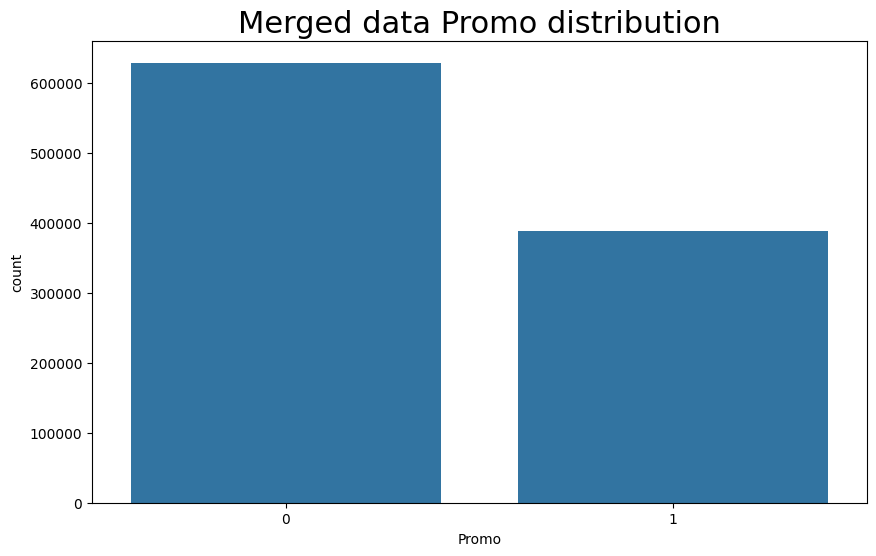

2024-09-24 16:37:05,776 - INFO - Visualizing the Promo destribution for test data
2024-09-24 16:37:05,793 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-24 16:37:05,805 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


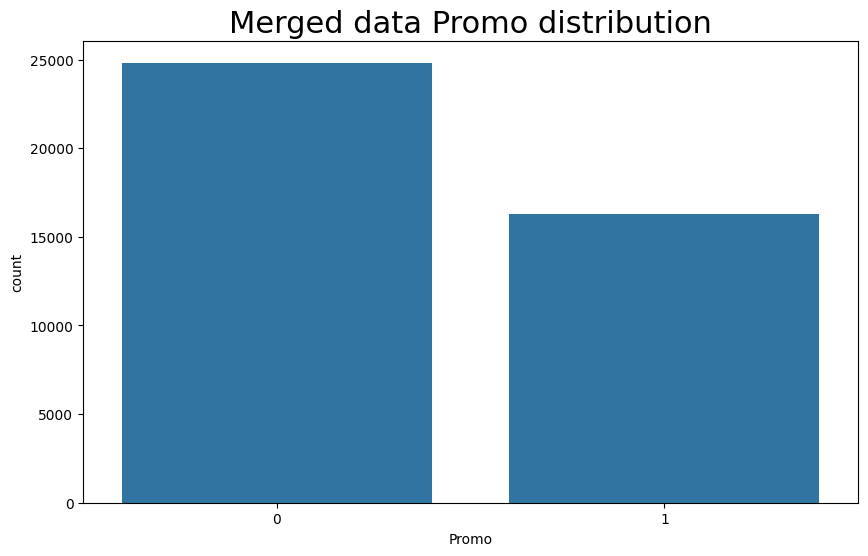

2024-09-24 16:37:05,855 - INFO - Analyzing the Seasonal Sales trends across the year using month


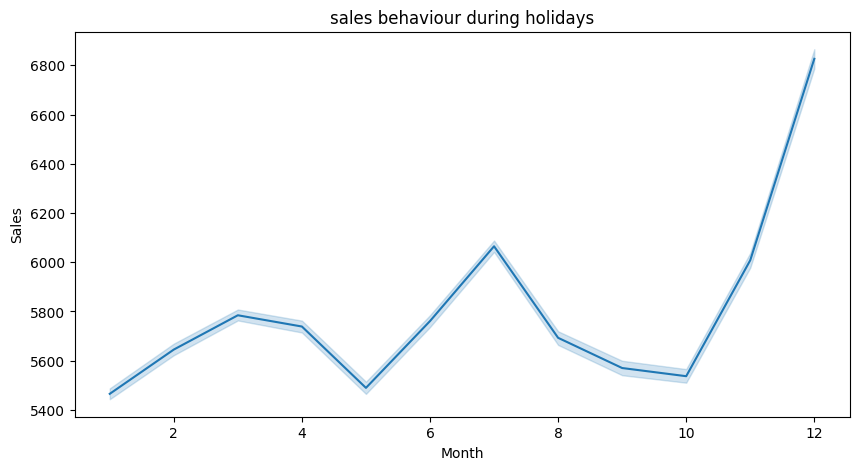

2024-09-24 16:37:11,017 - INFO - Analyzing the Seasonal Sales trends across the year using weeks


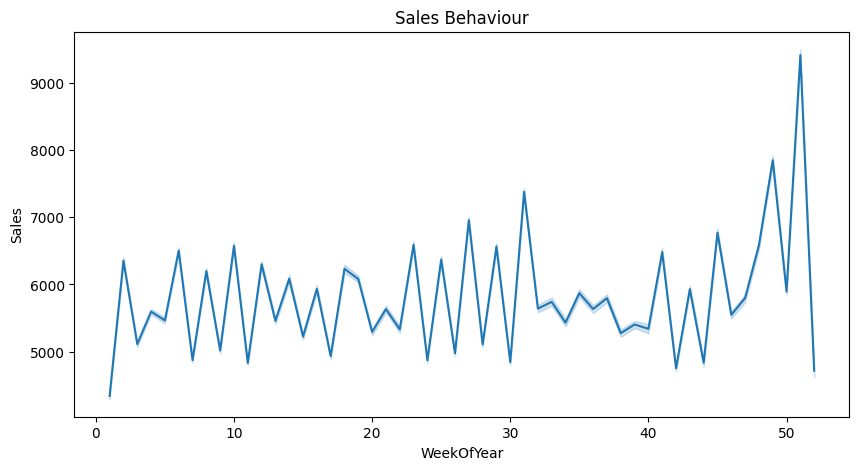

2024-09-24 16:37:16,434 - INFO - Analyzing the correlation between customers and sales


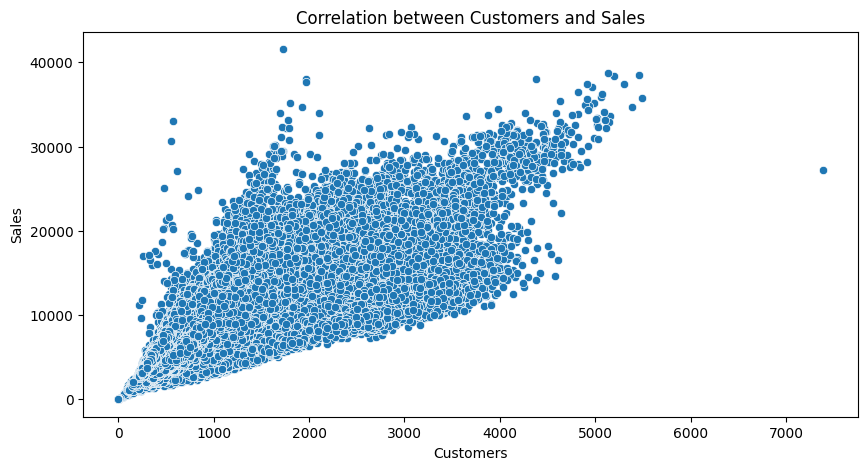

2024-09-24 16:37:17,104 - INFO - Analyzing the impact of promo on sales
2024-09-24 16:37:17,408 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-24 16:37:17,677 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


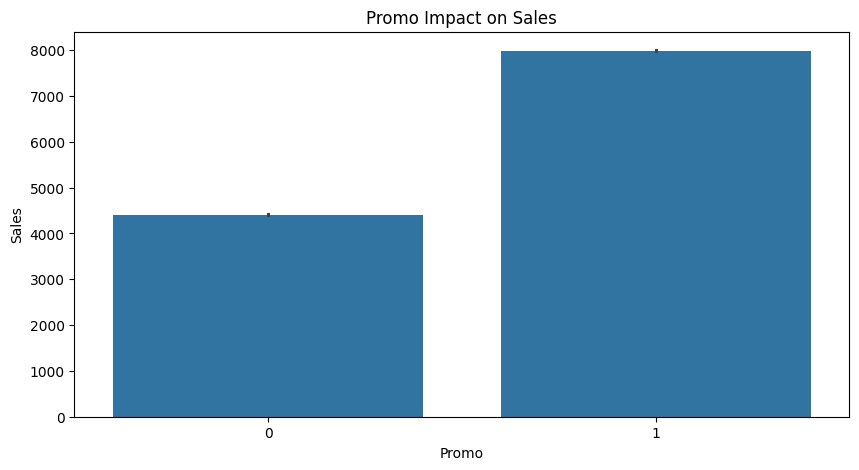

2024-09-24 16:37:23,209 - INFO - Analyzing the impact of promo on customers
2024-09-24 16:37:23,525 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-24 16:37:23,793 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


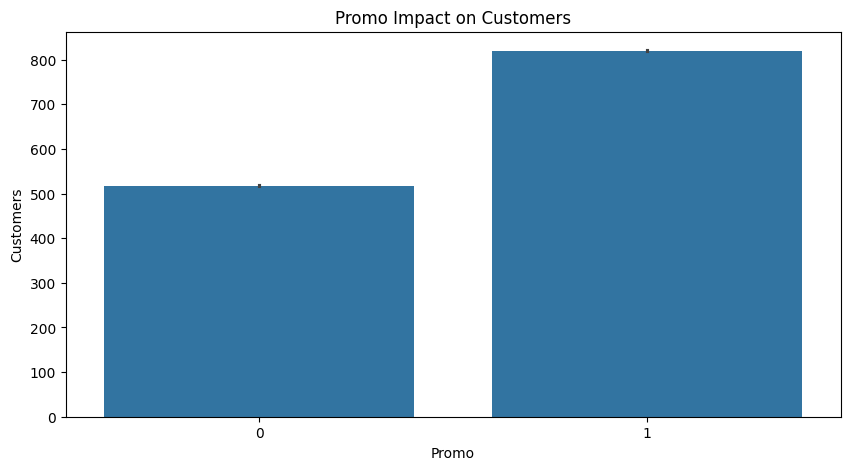

2024-09-24 16:37:29,328 - INFO - Analyzing the impact of assortment on sales


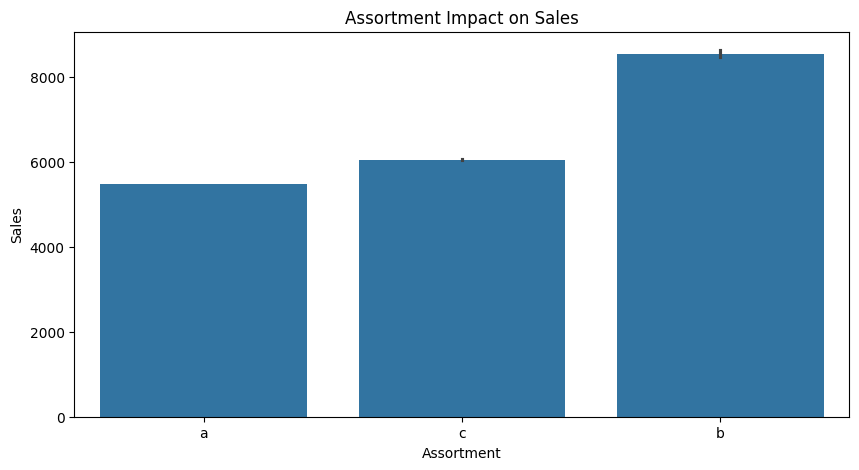

2024-09-24 16:37:35,812 - INFO - Analyzing the impact of competition distance on sales


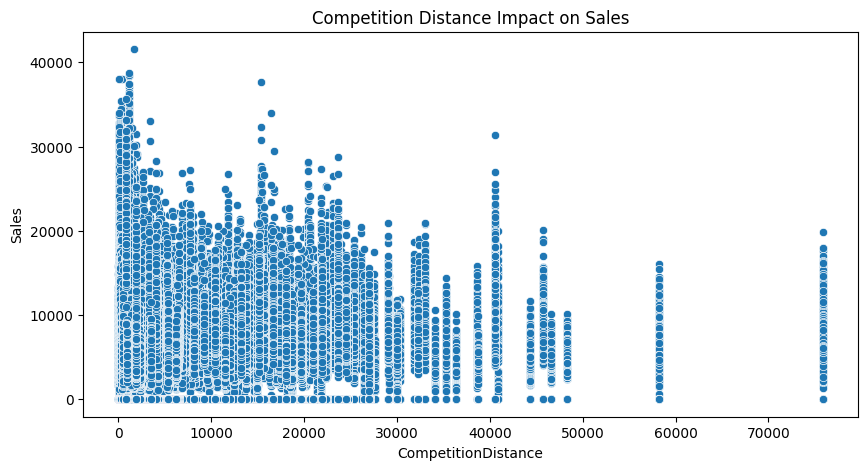

In [39]:
eda()